In [36]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

In [37]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Extract feature values and labels from the data
mnist_train_labels = np.array(mnist.train.labels)
mnist_train_images =  np.array(mnist.train.images)
mnist_valid_images =  np.array(mnist.validation.images)
mnist_valid_labels =  np.array(mnist.validation.labels)
mnist_test_labels =  np.array(mnist.test.labels)
mnist_test_images =  np.array(mnist.test.images)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


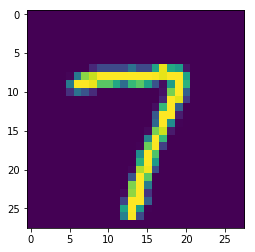

In [38]:
example = mnist_train_images[100]
mnist_train_images.shape
plt.imshow(np.reshape(example,[28,28]))

In [39]:
# ...
# Here we determine the probabilities and predictions for each class when given a set of input data
# ...
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [40]:
# ...
# Here we perform the softmax transformation: This allows us to get probabilities for each class score that sum to 100%.
# ...
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
#     print("Returning softmax : ", sm)
    return sm

In [41]:
# ...
# Here we define the loss function for softmax regression.
# ...
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples    
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [44]:
# ...
# This is the main loop of the softmax regression.
# Here we initialize our weights, regularization factor, number of iterations,
# and learning rate. We then loop over a computation of the loss and gradient,
# and application of gradient.
# ...
x = mnist_train_images
y = mnist_train_labels
w = np.zeros([x.shape[1], 10])
lam = 1
iterations = 100
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
    print("Loss for iteration : ", i, "is : ", loss)
print(loss)

Loss for iteration :  0 is :  2.30258509299
Loss for iteration :  1 is :  2.30257426964
Loss for iteration :  2 is :  2.30256344661
Loss for iteration :  3 is :  2.3025526239
Loss for iteration :  4 is :  2.30254180152
Loss for iteration :  5 is :  2.30253097947
Loss for iteration :  6 is :  2.30252015774
Loss for iteration :  7 is :  2.30250933633
Loss for iteration :  8 is :  2.30249851525
Loss for iteration :  9 is :  2.3024876945
Loss for iteration :  10 is :  2.30247687407
Loss for iteration :  11 is :  2.30246605396
Loss for iteration :  12 is :  2.30245523418
Loss for iteration :  13 is :  2.30244441473
Loss for iteration :  14 is :  2.3024335956
Loss for iteration :  15 is :  2.30242277679
Loss for iteration :  16 is :  2.30241195831
Loss for iteration :  17 is :  2.30240114016
Loss for iteration :  18 is :  2.30239032233
Loss for iteration :  19 is :  2.30237950482
Loss for iteration :  20 is :  2.30236868764
Loss for iteration :  21 is :  2.30235787079
Loss for iteration :  2

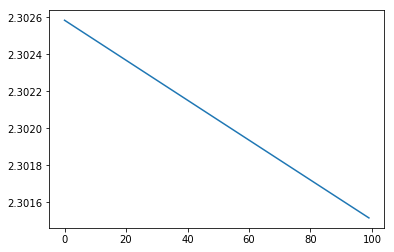

In [45]:
plt.plot(losses)

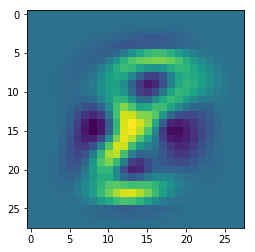

In [46]:
classWeightsToVisualize = 8
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))

In [49]:
print ('Training Accuracy: ', getAccuracy(x,y))
testX = mnist_test_images
testY = mnist_test_labels
print ( 'Test Accuracy: ', getAccuracy(testX,testY))

Training Accuracy:  0.6625272727272727
Test Accuracy:  0.671


In [48]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    c = 0;
    for i in range(len(someY)):
        test = someY[i, prede[i]]
        if  test == 1:
            c+=1
    accuracy = c/(float(len(someY)))        
    return accuracy

In [33]:
def get_my_usps_data(): 
    import zipfile
    import os
    from PIL import Image
    import PIL.ImageOps  
    import numpy as np
    import tensorflow  as tf
    import matplotlib.pyplot as plt

    filename="usps_dataset_handwritten.zip"

    #Defining height,width for resizing the images to 28x28 like MNIST digits
    height=28
    width=28

    #Defining path for extracting dataset zip file
    extract_path = "usps_data"

    #Defining image,label list
    images = []
    img_list = []
    labels = []

    #Extracting given dataset file    
    with zipfile.ZipFile(filename, 'r') as zip:
        zip.extractall(extract_path)

    #Extracting labels,images array needed for training    
    for root, dirs, files in os.walk("."):
        path = root.split(os.sep)

        if "Numerals" in path:
            image_files = [fname for fname in files if fname.find(".png") >= 0]
            for file in image_files:
                labels.append(int(path[-1]))
                images.append(os.path.join(*path, file)) 

    #Resizing images like MNIST dataset   
    for idx, imgs in enumerate(images):
        img = Image.open(imgs).convert('L') 
        img = img.resize((height, width), Image.ANTIALIAS)
        img_data = list(img.getdata())
        img_list.append(img_data)

    #Storing image and labels in arrays to be used for training   
    USPS_img_array = np.array(img_list)
    USPS_img_array = np.subtract(255, USPS_img_array)
    USPS_label_array = np.array(labels)
    #print(USPS_label_array.shape)
    nb_classes = 10
    targets = np.array(USPS_label_array).reshape(-1)
    aa = np.eye(nb_classes)[targets]
    USPS_label_array = np.array(aa, dtype=np.int32)
    #print(USPS_label_array)


    USPS_img_array = np.float_(np.array(USPS_img_array))
    for z in range(len(USPS_img_array)):
        USPS_img_array[z] /= 255.0 

    plt.imshow(USPS_img_array[19998].reshape(28,28))
    plt.show()
    
    
    return USPS_img_array, USPS_label_array

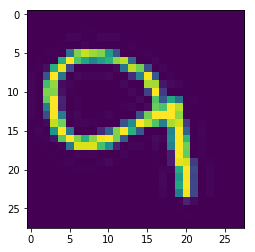

In [34]:
USPS_img_array, USPS_label_array = get_my_usps_data()


In [35]:
'''
A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

'''

from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes labels

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax predicted values

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print("Accuracy of MNIST Training SET:", accuracy.eval({x: mnist.train.images, y: mnist.train.labels}))
    print("Accuracy of MNIST VAlidation SET:", accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels}))
    print("Accuracy of MNIST TESTING SET:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    print("Accuracy of USPS Numeral SET:", accuracy.eval({x: testtty , y: np.float_(USPS_label_array)}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.183795122
Epoch: 0002 cost= 0.665195716
Epoch: 0003 cost= 0.552762509
Epoch: 0004 cost= 0.498667078
Epoch: 0005 cost= 0.465457584
Epoch: 0006 cost= 0.442547556
Epoch: 0007 cost= 0.425525734
Epoch: 0008 cost= 0.412158962
Epoch: 0009 cost= 0.401384600
Epoch: 0010 cost= 0.392403505
Epoch: 0011 cost= 0.384773200
Epoch: 0012 cost= 0.378174692
Epoch: 0013 cost= 0.372425060
Epoch: 0014 cost= 0.367293216
Epoch: 0015 cost= 0.362725902
Epoch: 0016 cost= 0.358642988
Epoch: 0017 cost= 0.354847474
Epoch: 0018 cost= 0.351436241
Epoch: 0019 cost= 0.348350410
Epoch: 0020 cost= 0.345441545
Epoch: 0021 cost= 0.342750276
Epoch: 0022 cost= 0.340259032
Epoch: 0023 cost= 0.337914452
Epoch: 0024 cost= 0.335685684
Epoch: 0025 cost= 0.333686076
Optimization Finished!
Accuracy of MNIST Training SET: 0.907

In [2]:
def aaas(): 
    return 1,2,3


In [6]:
op,_,_ = aaas()

In [7]:
op

1